# Loading Images, Converting to Arrays and Splitting

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import load_img
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Regularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout



In [3]:
from tensorflow.keras import backend as K

K.clear_session()

In [4]:
X = []
y = []
classes = ['empty', 'bird', 'mug', 'sunglass']
base_path = 'imageclassifier/data/'

for i, target in enumerate(classes):
      files = os.listdir(base_path+target)  #gets the list of all files and directories in the specified directory
      for file in files:
         # load the image
         img = load_img(base_path+target+'/'+file)
         # convert it to an array
         img_array = asarray(img)
         # append the array to X
         X.append(img_array)
         # append the numeric target to y
         y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [5]:
X

array([[[[161, 155, 146],
         [161, 155, 146],
         [164, 155, 149],
         ...,
         [176, 165, 162],
         [175, 167, 163],
         [175, 167, 163]],

        [[162, 157, 147],
         [162, 157, 147],
         [163, 157, 150],
         ...,
         [174, 166, 162],
         [172, 166, 162],
         [172, 166, 162]],

        [[165, 157, 146],
         [165, 157, 146],
         [163, 158, 146],
         ...,
         [175, 167, 161],
         [174, 168, 161],
         [174, 168, 161]],

        ...,

        [[161, 161, 161],
         [161, 161, 161],
         [158, 158, 160],
         ...,
         [159, 156, 159],
         [162, 154, 159],
         [163, 155, 160]],

        [[160, 162, 164],
         [159, 161, 163],
         [158, 158, 160],
         ...,
         [159, 156, 159],
         [160, 155, 159],
         [161, 156, 160]],

        [[159, 164, 160],
         [155, 160, 156],
         [153, 158, 156],
         ...,
         [160, 157, 158],
        

In [6]:
y

array([2, 2, 3, ..., 2, 3, 0])

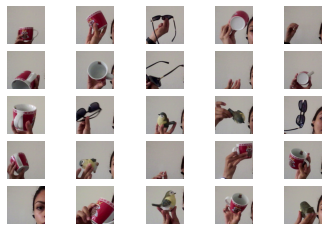

In [7]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [8]:
X.shape, y.shape

((2155, 224, 224, 3), (2155,))

In [9]:
#spliting the data
xtrain = X[:1855,:,:,:]
xtest = X[1855:,:,:,:]

ytrain = y[:1855]
ytest = y[1855:]

In [10]:
xtrain.shape, xtest.shape

((1855, 224, 224, 3), (300, 224, 224, 3))

In [11]:
xtrain[31].shape

(224, 224, 3)

In [12]:
ytest_true = ytest.copy()

# Normalizing the data to help with the training (Scale these values to a range of 0 to 1)

In [13]:
xtrain = xtrain / 255.0

xtest = xtest / 255.0

# One-Hot-Encoding the labels

In [14]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# Pretrained Model (VGG 16)

## Initializing the model 

In [16]:
from tensorflow.keras import backend as K
K.clear_session()

In [17]:
from PIL import Image
from tensorflow import keras

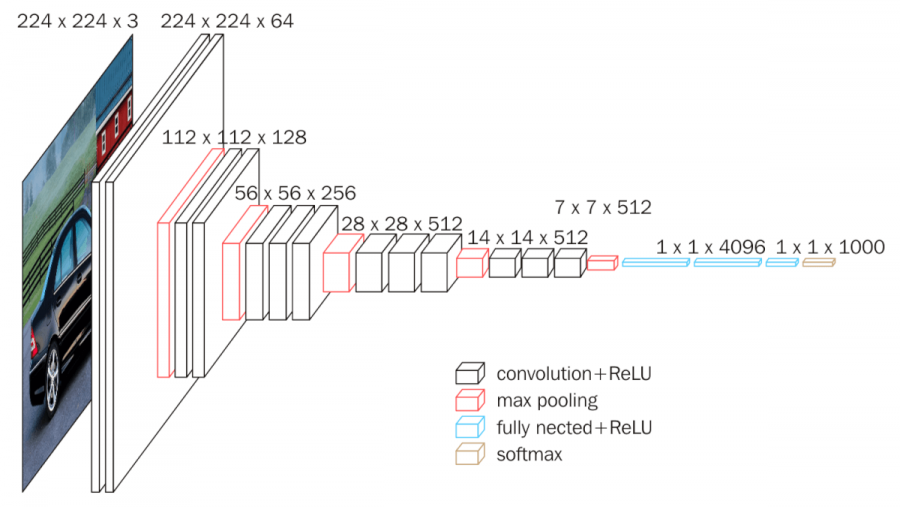

In [18]:
from IPython import display

display.Image("VGG16.net.png")

In [19]:
#Image Net is a database of 14 million hand annotated images

vgg_model = keras.applications.vgg16.VGG16(weights='imagenet') 

In [20]:
vgg_model.summary() #16 layers with weights, 13 convolutions.
                    #138 million parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
f'VGG16 has {len(vgg_model.layers)} layers'

'VGG16 has 23 layers'

## Preparing the input & Making prediction

In [24]:
X.shape  # The image sizes are correct

(2155, 224, 224, 3)

In [25]:
X[1].shape

(224, 224, 3)

In [27]:
image = np.expand_dims(X[1], axis=0)
image.shape

(1, 224, 224, 3)

In [28]:
processed = keras.applications.vgg16.preprocess_input(image)
processed.shape

(1, 224, 224, 3)

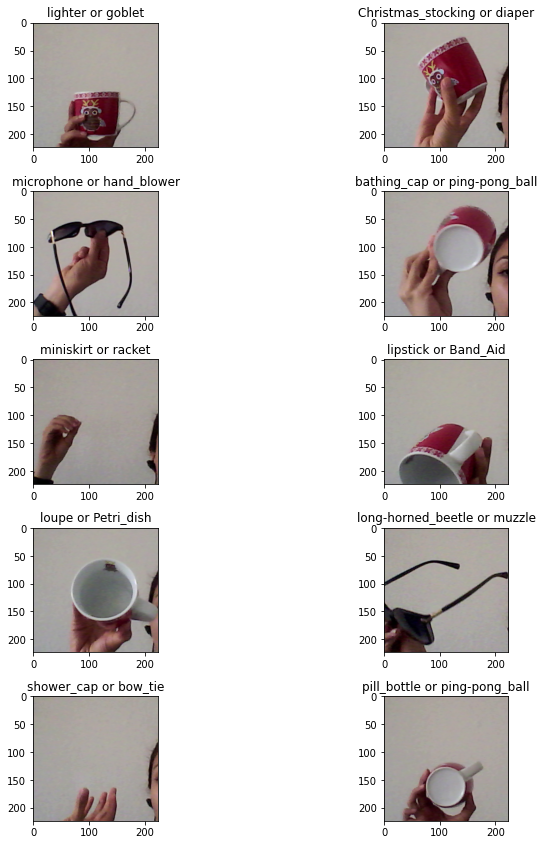

In [32]:
# add an extra dimention (n_samples,hight, width, color_channels)
# pre-process the input image to make it more similar to the training set

plt.rcParams['figure.figsize'] = (10,35)
for i in range(10):
    image_batch = np.expand_dims(X[i], axis=0) #add 1 dimention
    processed_image = keras.applications.vgg16.preprocess_input(image_batch) #preprocess image
    """predict"""
    prediction = vgg_model.predict(processed_image)
    label_vgg = keras.applications.imagenet_utils.decode_predictions(prediction) #extract label
    """plot"""
    plt.subplot(15,2,i+1);
    plt.tight_layout()
    plt.imshow(X[i])
    plt.title(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )